<a href="https://colab.research.google.com/drive/1lt4-Fo1hCF-SeTDmDXOXs8Q90Hf_HIvO#scrollTo=Ms3TzSbfL1tD" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.animation as animation
import matplotlib.image as mpimg
from IPython.display import HTML

In [17]:
# Definição do diretório onde estão armazenadas as imagens dos brasões dos times
logo_dir = "/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br"

In [18]:
# Carregar o DF
df = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/scatter_plot/xG_br23_geral.csv', sep=';')
df.head()

,Equipe,path,Xpected,1,2,3,4,5,6,7,8,9,10,11
0,América Mineiro,América Mineiro.png,xG,1.1,1.1,1.8,1.4,2.0,1.3,0.8,0.4,1.4,1.8,0.8
1,América Mineiro,América Mineiro.png,xGA,3.1,2.4,1.8,0.5,1.7,2.7,1.2,2.1,1.2,0.8,2.2
2,Athletico,Athletico.png,xG,0.8,0.6,0.6,1.0,1.5,2.9,1.1,1.3,0.9,0.8,1.2
3,Athletico,Athletico.png,xGA,1.0,0.8,2.0,1.5,1.0,0.4,1.7,0.7,0.6,1.8,0.6
4,Atlético Mineiro,Atlético Mineiro.png,xG,1.5,1.2,2.0,0.5,2.8,2.0,1.5,0.8,0.6,1.8,1.4


In [19]:
# Ajustar as colunas e transformar em valores int
df = df.melt(id_vars=['Equipe', 'path', 'Xpected'], var_name='Rodada', value_name='Valor')
df['Rodada'] = df['Rodada'].astype(int)

In [20]:
# Calcula a soma acumulada dos valores de xG e xGA por equipe e rodada
df_pivot = df.pivot_table(index=['Equipe', 'path', 'Rodada'], columns='Xpected', values='Valor').reset_index()
df_pivot['xG_cumsum'] = df_pivot.groupby('Equipe')['xG'].cumsum()
df_pivot['xGA_cumsum'] = df_pivot.groupby('Equipe')['xGA'].cumsum()

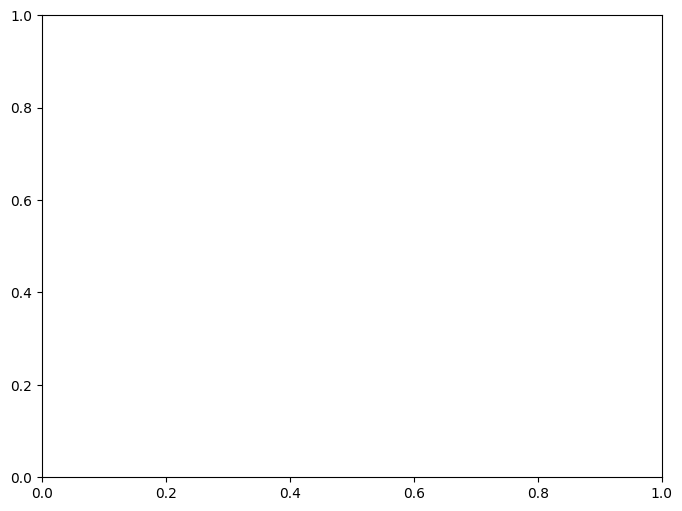

In [21]:
# Criação da figura e dos eixos
fig, ax = plt.subplots(figsize=(8, 6))

In [22]:
# Carregamento das imagens dos brasões dos times
logos = {}
for equipe in df['Equipe'].unique():
    logo_path = f"{logo_dir}/{equipe}.png"
    logo_img = mpimg.imread(logo_path)
    logos[equipe] = logo_img

# Função de atualização do gráfico para cada quadro da animação
def update(frame):
    ax.clear()

    # Filtra os dados da rodada atual
    current_data = df_pivot[df_pivot['Rodada'] == frame + 1]

    # Plotagem do gráfico de dispersão para a rodada atual com transparência reduzida e brasões como marcadores
    scatter_current = ax.scatter(current_data['xG_cumsum'], current_data['xGA_cumsum'], alpha=0.3)

    for i, (xg_cumsum, xga_cumsum, equipe) in enumerate(zip(current_data['xG_cumsum'], current_data['xGA_cumsum'], current_data['Equipe'])):
        logo_img = logos[equipe]
        imagebox = OffsetImage(logo_img, zoom=0.08)# tamanho do brasão
        ab = AnnotationBbox(imagebox, (xg_cumsum, xga_cumsum), frameon=False)
        ax.add_artist(ab)

    # Configuração dos rótulos dos eixos
    ax.set_xlabel('xG For')
    ax.set_ylabel('xGA Against')
    ax.set_title(f'Rodada {frame+1}')

    # Configuração da legenda
    legend = ax.legend(*scatter_current.legend_elements(), loc='upper right', title='Equipe')
    ax.add_artist(legend)

In [23]:
# Criação da animação
animation = animation.FuncAnimation(fig, update, frames=df_pivot['Rodada'].max(), interval=1000)

In [24]:
# Salvar a animação em um arquivo .gif
animation.save('animacao.gif', writer='imagemagick')

# Exibir a animação no Google Colab
HTML(animation.to_jshtml())

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
